In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from tqdm import tqdm

In [9]:
h=0.01
L=6.0
X = np.arange(-L,L+h,h)
def f(x,e):
    return (x**2-e)
def y(x,e):
    return 1-(h**2/12)*f(x,e)

In [10]:
def Numerov(x0,xf,p0,p1,e):
    n=int((xf-x0)/h)
    xs=np.zeros((n+1))
    psi=np.zeros((n+1))
    state=0
    xs[0],xs[1]=x0,x0+h
    psi[0],psi[1]=p0,p1
    for i in range(1,n):
        psi[i+1]=((psi[i]*(12-10*y(X[i],e))-y(X[i-1],e)*psi[i-1])/y(X[i+1],e))
        xs[i+1]=xs[i]+h
        
        #psi.append(psih)
        #xs.append(xsh)
        if psi[i]*psi[i+1]<0:
            state=state+1
    return xs,psi,psi[-1],state      

# Start one guess

In [11]:
def Bisection(a,b):
    tolerance=0.000000001
    midpoint=0
    xs1,psi1,q1,n1=Numerov(-L,L,0,0.0000001,a)
    xs2,psi2,q2,n2=Numerov(-L,L,0,0.0000001,b)
    if q1*q2>0:
        print('choose right values of a and b')
    else:
        while(abs(b-a)>tolerance):
            xs1,psi1,q1,n1=Numerov(-L,L,0,0.0000001,a)
            xs2,psi2,q2,n2=Numerov(-L,L,0,0.0000001,b)
            midpoint=(a+b)/2
            xsm,psim,qm,nm=Numerov(-L,L,0,0.0000001,midpoint)
            if q1*qm<0:
                b=midpoint
            if q2*qm<0:
                a=midpoint
        print("The energy eigenvalue is",midpoint,"corresponding to",nm,"excited state")
    return midpoint

In [5]:
a=0.2
da=0.35
for i in range(0,3):
    xs1,psi1,q1,n1=Numerov(-L,L,0,0.000000001,a)
    xs2,psi2,q2,n2=Numerov(-L,L,0,0.000000001,a+da)
    while(n1==n2):  
        xs1,psi1,q1,n1=Numerov(-L,L,0,0.000000001,a)
        xs2,psi2,q2,n2=Numerov(-L,L,0,0.000000001,a+da)
        if (n1==n2):    ## when both wavefunction have same 
            a=a+da
        else:   ## When two wavefunctions have different sign then use bisection method to find root between them
            w=Bisection(a,a+da)
    a=a+da

The energy eigenvalue is 0.9999999999068677 corresponding to 0 excited state
The energy eigenvalue is 2.9999999993480744 corresponding to 1 excited state
The energy eigenvalue is 4.999999997485428 corresponding to 2 excited state


In [12]:
xs1,psi1,q1,n1=Bisection(2.8,3.2)

The energy eigenvalue is 2.9999999992549418 corresponding to 1 excited state


TypeError: cannot unpack non-iterable float object

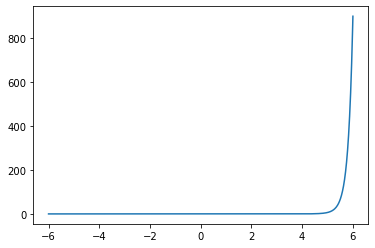

In [7]:
plt.plot(xs1,psi1)